In [1]:
import numpy as np
import pandas as pd
%matplotlib inline

In [19]:
n=200
M = np.diag(np.repeat(2,n),k=0) + np.diag(np.repeat(-1,n-1),k=1) + np.diag(np.repeat(-1,n-1),k=-1)
M[n-1,0] = -1.0
M[0,n-1] = -1.0
b = np.repeat(-1/n,n)
b[0] = 1 - 1/n

In [20]:
np.linalg.eig(M)

(array([4.00000000e+00, 3.99901312e+00, 3.99605346e+00, 3.99112393e+00,
        3.98422940e+00, 3.97537668e+00, 3.96457450e+00, 3.95183352e+00,
        3.93716632e+00, 3.92058737e+00, 3.90211303e+00, 3.85955297e+00,
        3.80965410e+00, 3.78201305e+00, 3.75261336e+00, 3.72148405e+00,
        3.88176154e+00, 3.83550925e+00, 3.88176154e+00, 3.83550925e+00,
        3.27484798e+00, 3.58031002e+00, 3.61803399e+00, 3.68865585e+00,
        3.65416115e+00, 3.99901312e+00, 3.99605346e+00, 3.99112393e+00,
        3.98422940e+00, 3.97537668e+00, 3.96457450e+00, 3.95183352e+00,
        3.93716632e+00, 3.92058737e+00, 3.90211303e+00, 3.85955297e+00,
        0.00000000e+00, 3.45793725e+00, 3.50022214e+00, 3.54102649e+00,
        3.75261336e+00, 3.78201305e+00, 3.80965410e+00, 3.32262373e+00,
        3.41421356e+00, 3.72148405e+00, 3.36909421e+00, 3.68865585e+00,
        3.12416676e+00, 3.17557050e+00, 3.07165359e+00, 3.22581411e+00,
        3.65416115e+00, 3.61803399e+00, 3.58031002e+00, 3.369094

In [21]:
np.dot(np.linalg.inv(M),M)

array([[-1. ,  0. , -0.5, ..., -0.5,  0. ,  1. ],
       [-1. ,  1.5, -1. , ...,  1. , -1. ,  0. ],
       [-1.5,  0. ,  1. , ...,  0.5, -1.5,  1. ],
       ...,
       [-2. ,  0. , -0.5, ...,  0.5,  0. ,  1. ],
       [-2. ,  0. , -0.5, ..., -0.5,  1. ,  1. ],
       [-2. ,  0. , -0.5, ..., -0.5,  0. ,  2. ]])

In [22]:
M.dot(np.linalg.pinv(M)).dot(M)

array([[ 2.00000000e+00, -1.00000000e+00, -3.55271368e-15, ...,
         3.55271368e-15, -7.10542736e-15, -1.00000000e+00],
       [-1.00000000e+00,  2.00000000e+00, -1.00000000e+00, ...,
         5.32907052e-15, -3.55271368e-15,  1.77635684e-15],
       [-3.55271368e-15, -1.00000000e+00,  2.00000000e+00, ...,
        -3.55271368e-15,  1.77635684e-15,  0.00000000e+00],
       ...,
       [ 1.77635684e-15, -8.88178420e-15,  8.88178420e-15, ...,
         2.00000000e+00, -1.00000000e+00,  0.00000000e+00],
       [ 3.55271368e-15,  7.10542736e-15, -1.24344979e-14, ...,
        -1.00000000e+00,  2.00000000e+00, -1.00000000e+00],
       [-1.00000000e+00, -1.06581410e-14,  1.42108547e-14, ...,
        -1.42108547e-14, -1.00000000e+00,  2.00000000e+00]])

In [23]:
f = lambda x:1/2*M.dot(x).dot(x) - b.dot(x)
#f = lambda x:np.dot(np.dot(M, x), x)/2 - np.dot(b,x)
x_star = np.linalg.pinv(M).dot(b)
f_star = f(x_star)
f_star

-8.333124999999967

In [24]:
np.array([1,2,3]).astype('float')

array([1., 2., 3.])

#### SD with constant stepsize 1/L

In [25]:
def SD(N,tol):
    x0 = np.repeat(0,n)
    x_old = x0
    alpha = 1/4
    value = [1/2*M.dot(x0).dot(x0) - b.dot(x0)]
    for i in range(N):
        x_new = x_old - alpha*(M.dot(x_old) - b)
        value.append(f(x_new))
        x_old = x_new
        if (f(x_new) - f_star)**2 <= tol:
            break
    return x_new, value

In [26]:
x,value = SD(600,1)
len(value)

601

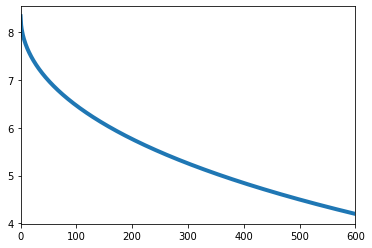

In [27]:
pd.Series(value - f_star).plot.line(linewidth = 4)

#### SD with constant exact line search

In [28]:
def SD_ls(N,tol):
    x0 = np.repeat(0,n)
    x_old = x0
    alpha = np.arange(0.05,1,step = 0.05)
    value = [1/2*M.dot(x0).dot(x0) - b.dot(x0)]
    for i in range(N):
        x_test = np.outer(np.ones(alpha.shape),x_old) - np.outer(alpha,M.dot(x_old) - b)
        test_vl = np.array(list(map(f,list(x_test))))
        index = np.argmin(test_vl)
        stepsize = alpha[index]
        x_new = x_test[index]
        value.append(test_vl[index])
        x_old = x_new
        if (f(x_new) - f_star)**2 <= tol:
            break
    return x_new, value

In [29]:
x,value = SD_ls(2000,1)
len(value)

1354

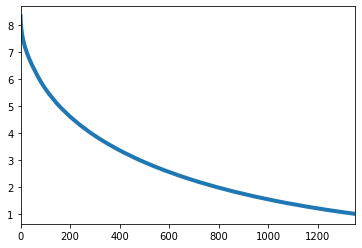

In [30]:
pd.Series(value - f_star).plot.line(linewidth = 4)

In [63]:
## correct one, according to notes
def SD_ls(N,tol):
    x0 = np.repeat(0,n)
    x_old = x0
    value = [1/2*M.dot(x0).dot(x0) - b.dot(x0)]
    for i in range(N):
        GD = M.dot(x_old) - b
        alpha = GD.dot(GD)/M.dot(GD).dot(GD)
        print(alpha)
        x_new = x_old - alpha*(M.dot(x_old) - b)
        value.append(f(x_new))
        x_old = x_new
        if (f(x_new) - f_star)**2 <= tol:
            break
    return x_new, value

In [64]:
x,value2 = SD_ls(20,1)
len(value)

0.4975000000000001
0.49997449304935565
0.49832467036325206
0.5003075353817328
0.49851366310761813
0.5004344911269961
0.49860530125903213
0.5005055008703881
0.49866167409299444
0.5005522629586603
0.49870074862446373
0.500585997251582
0.49872985519913876
0.5006117952424288
0.49875260826762874
0.5006323408363659
0.4987710208114473
0.5006491992939827
0.49878631379932453
0.5006633526976013


1354

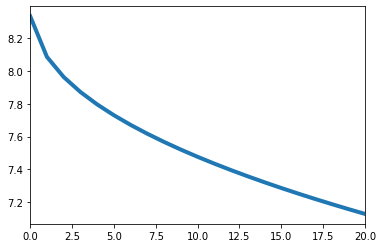

In [65]:
pd.Series(value2 - f_star).plot.line(linewidth = 4)

In [37]:
#df = pd.DataFrame({"SD:exact":value, "SD:exact2": value2})
#df.plot.line(linewidth = 4)

#### lagged SD with constant exact line search

In [75]:
## correct one, according to notes
def lSD_ls(N,tol):
    x0 = np.repeat(0,n)
    x_old = x0
    stepsize = np.repeat(0,N).astype(float)
    value = [1/2*M.dot(x0).dot(x0) - b.dot(x0)]
    for i in range(N):
        GD = M.dot(x_old) - b
        alpha = GD.dot(GD)/M.dot(GD).dot(GD)
        stepsize[i] = alpha
        if i == 0:
            x_new = x_old - stepsize[i]*GD
        else:
            x_new = x_old - stepsize[i-1]*GD
            
        value.append(f(x_new))
        x_old = x_new
        if (f(x_new) - f_star)**2 <= tol:
            break
    return x_new, value, stepsize

In [76]:
x,value2, stepsize = lSD_ls(2000,1)
len(value2)
stepsize

array([0.4975    , 0.49997449, 0.50331487, ..., 0.        , 0.        ,
       0.        ])

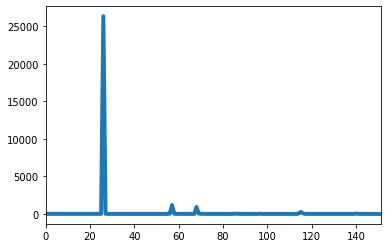

In [77]:
pd.Series(value2 - f_star).plot.line(linewidth = 4)

In [70]:
#df = pd.DataFrame({"lSD:exact":value, "lSD:exact2": value2})
#df.plot.line(linewidth = 4)

In [ ]:
def lSD_ls(N,tol):
    x0 = np.repeat(0,n)
    x_old = x0
    alpha = np.arange(0.05,1,step = 0.05)
    value = [1/2*M.dot(x0).dot(x0) - b.dot(x0)]
    stepsize = np.repeat(0,N).astype(float)
    for i in range(N):
        GD = M.dot(x_old) - b
        x_test = np.outer(np.ones(alpha.shape), x_old) - np.outer(alpha, GD)
        test_vl = np.array(list(map(f,list(x_test))))
        index = np.argmin(test_vl)
        inte = alpha[index]
        stepsize[i] =  inte
        #print(inte)
        #print(stepsize[i])
        if i == 0:
            x_new = x_old - stepsize[i]*GD
        else:
            x_new = x_old - stepsize[i-1]*GD
        value.append(f(x_new))
        x_old = x_new
        if (f(x_new) - f_star)**2 <= tol:
            break
    return x_new, value, stepsize

In [ ]:
x,value, stepsize = lSD_ls(2000,1)
len(value)

In [ ]:
pd.Series(value - f_star).plot.line(linewidth = 4)

#### Nesterov:

In [ ]:
def AGD(N,tol):
    x0 = np.repeat(0,n)
    alpha = 1/4
    y0 = x0 - alpha*(M.dot(x0) - b)
    v0 = y0
    value = [1/2*M.dot(x0).dot(x0) - b.dot(x0)]
    x_old = x0
    y_old = y0
    v_old = v0
    for i in np.arange(1,N+1):
        a = np.arange(1,i+1/2,1/2)
        A = a.sum()
        
        x_new = (A-a[-1])/A*y_old + a[-1]/A*v_old
        y_new = x_new - alpha*(M.dot(x_new) - b)
        v_new = v_old - a[-1]*alpha*(M.dot(x_new) - b)
        
        value.append(f(y_new))
        x_old = x_new; y_old = y_new; v_old = v_new
        if (f(y_new) - f_star)**2 <= tol:
            break
    return y_new, value

In [ ]:
x,value = AGD(2000,1)
len(value)

In [ ]:
pd.Series(value - f_star).plot.line(linewidth = 4)

In [ ]:
for i in range(3):
    a[i] = a[1]+10
a

In [ ]:
np.arange(start = 1,stop = 9.5,step = 1/2)

In [ ]:
a = np.arange(1,9)
a

In [ ]:
a[-1]

#### 1

In [ ]:
log(value)

In [ ]:
a = np.array([2,4,5,1])
a

In [ ]:
np.log(a)

In [ ]:
a = [2,3,6,2,4,5,3,45,2]
a

In [ ]:
a[-1] = np.max(a)
a